In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'train_small'
validation_data_dir = 'val_small'
nb_train_samples = 2000
nb_validation_samples = 100
epochs = 100
batch_size = 25

Using TensorFlow backend.


In [2]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) # Laters labels are generated in similar sense. 
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)

    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples // batch_size)
    
    np.save('bottleneck_features_validation.npy', bottleneck_features_validation)



In [3]:
save_bottlebeck_features()

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
def train_top_model():
    train_data = np.load('bottleneck_features_train.npy')
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load('bottleneck_features_validation.npy')
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    with open('vgg16 bottleneck cat-dog.json','w') as json_file:
        try:
            json_model = model.to_json()
            json_file.write(json_model)
            print('successfully exported model to json format')
        except:
            print('can\'t export model to json format')            
        
    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


In [5]:
from keras.models import model_from_json
model = model_from_json(open("vgg16 bottleneck cat-dog.json", 'r').read())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_top_model()

successfully exported model to json format
Train on 2000 samples, validate on 100 samples
Epoch 1/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8047 - acc: 0.7480 - val_loss: 1.0390 - val_acc: 0.4400
Epoch 2/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3687 - acc: 0.8425 - val_loss: 2.6516 - val_acc: 0.4700
Epoch 3/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3461 - acc: 0.8660 - val_loss: 2.0037 - val_acc: 0.4700
Epoch 4/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2566 - acc: 0.8995 - val_loss: 3.2338 - val_acc: 0.5000
Epoch 5/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2447 - acc: 0.9035 - val_loss: 1.8437 - val_acc: 0.4700
Epoch 6/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2149 - acc: 0.9160 - val_loss: 3.1948 - val_acc: 0.4700
Epoch 7/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.1909 - acc: 0.9210 - 

2000/2000 [==============================] - 5s 2ms/step - loss: 0.0094 - acc: 0.9965 - val_loss: 6.7881 - val_acc: 0.4700
Epoch 61/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0040 - acc: 0.9990 - val_loss: 7.0285 - val_acc: 0.4800
Epoch 62/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0068 - acc: 0.9985 - val_loss: 7.2644 - val_acc: 0.4900
Epoch 63/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0070 - acc: 0.9970 - val_loss: 7.2753 - val_acc: 0.4900
Epoch 64/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0051 - acc: 0.9980 - val_loss: 7.2493 - val_acc: 0.4800
Epoch 65/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0163 - acc: 0.9975 - val_loss: 7.3776 - val_acc: 0.4700
Epoch 66/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0193 - acc: 0.9950 - val_loss: 7.1945 - val_acc: 0.4900
Epoch 67/100
2000/2000 [==============================] - 3s 

Found 2000 images belonging to 2 classes.


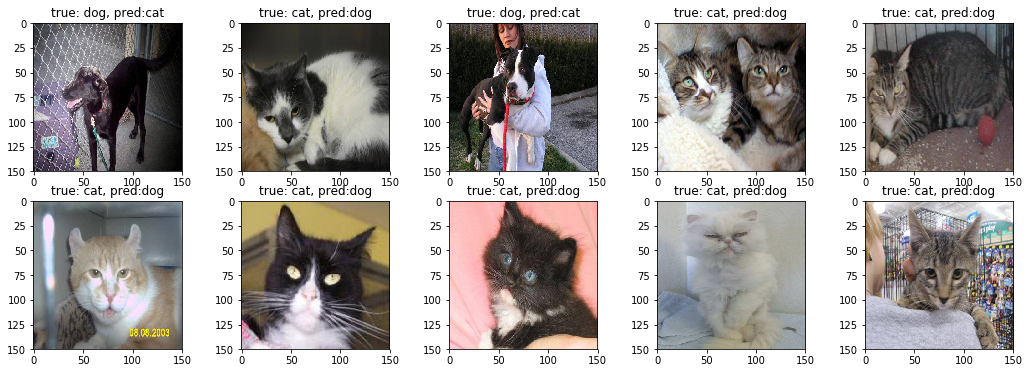

In [12]:
label  = ["dog", "cat"]
ncol   = 5 # number of columns in subplots, int
model_json = "vgg16 bottleneck cat-dog.json"
model_weight = top_model_weights_path

# Import before function call 
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def predict(model_json, model_weight, label, ncol=5):
    model = model_from_json(open(model_json, "r").read())
    model.load_weights(model_weight)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    pred = ImageDataGenerator(rescale=1./255)
    pred_gen = pred.flow_from_directory("validation", target_size=(150, 150), batch_size=10, classes=['dog', 'cat'], class_mode='binary' )
    img, lab = pred_gen[0]

    model_vgg_trunc = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features = model_vgg_trunc.predict(img)

    prediction = model.predict_classes(bottleneck_features)

    fig, ax = plt.subplots(nrows=len(lab)//ncol, ncols=ncol)
    fig.set_figwidth(18)
    fig.set_figheight(6)

    for i in range(len(lab)):
        a, b = i//ncol, i-(i//ncol)*ncol
        ax[a,b].imshow(img[i])
        ax[a,b].set_title("true: " + label[int(lab[i])] + ", pred:" + label[int(prediction[i])])

# function call
predict(model_json, model_weight, label, ncol)